In [3]:
# Применение критерия хи-квадрат Пирсона к проверке гипотезы о виде функции распределения;

# Лабораторная работа № 9 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

# Данные: Закон распределения F(x): E(lambda), alpha = 0.02;
# E(lambda): p(x) = lambda * e ^ (-lambda * x), x > 0;

In [4]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.stats as ss
from math import exp
import numpy as np

In [6]:
data = np.array([[2.064, 0.94, 4.928, 0.943, 3.695, 5.482, 0.705, 0.939, 1.396, 2.415],
                 [1.395, 0.146, 1.64, 1.997, 0.041, 1.548, 2.209, 1.059, 0.232, 0.039],
                 [0.466, 1.32, 0.241, 2.868, 4.77, 2.482, 1.023, 1.389, 0.222, 2.169],
                 [5.375, 1.608, 1.941, 1.464, 1.208, 1.542, 0.619, 1.906, 0.741, 2.604],
                 [6.927, 1.79, 4.381, 0.043, 1.503, 0.417, 2.303, 1.537, 10.921, 2.087],
                 [9.411, 3.633, 2.254, 2.814, 0.497, 3.044, 2.832, 1.367, 3.648, 9.483],
                 [1.668, 0.828, 5.557, 6.035, 1.171, 0.333, 1.104, 2.632, 0.58, 2.676],
                 [3.604, 0.823, 1.396, 7.921, 3.041, 2.261, 0.233, 2.1, 0.026, 0.36],
                 [2.939, 3.2, 0.234, 5.611, 6.665, 3.222, 3.233, 2.51, 1.78, 0.028],
                 [4.649, 0.577, 0.472, 0.13, 4.305, 1.198, 5.612, 2.77, 0.132, 0.18],
                 [5.663, 1.774, 1.097, 0.305, 1.638, 6.714, 0.088, 3.123, 0.149, 5.202],
                 [0.401, 9.007, 0.148, 1.748, 6.172, 2.424, 1.253, 0.33, 2.136, 2.776],
                 [0.231, 1.896, 2.424, 0.659, 0.116, 9.778, 0.43, 4.015, 1.162, 0.651],
                 [0.23, 0.514, 7.561, 5.953, 0.255, 1.739, 0.196, 0.301, 0.071, 1.896],
                 [2.29, 1.102, 3.983, 0.152, 1.307, 0.503, 1.423, 6.213e-3, 0.15, 3.704]], dtype="float32")


sub_data = list(data.flatten()) # 'Спрямлённый' список данных
n = len(sub_data)
print("Колличество измерений в массиве данных: ", n)

Колличество измерений в массиве данных:  150


In [7]:
# Найдите крайние члены вариационного ряда и размах выборки.

mini = round(np.min(data), 5)
maxi = round(np.max(data), 5)
w = maxi - mini
print("Минимальный член вариационного ряда:", mini)
print("Максимальный член вариационного ряда:", maxi)
w = round(maxi - mini, 5)
print("Размах выборки:", w)

Минимальный член вариационного ряда: 0.00621
Максимальный член вариационного ряда: 10.921
Размах выборки: 10.91479


In [8]:
# Осуществите группировку данных (количество интервалов находим по правилу Стерджеса).

l = 1 + int(np.log2(n))
h = round(w / l, 5)
print("Число интервалов:", l)
print("Ширина интервала:", h)

Число интервалов: 8
Ширина интервала: 1.36435


In [13]:
# Группировка данных:
f_0 = [np.min(sub_data)] # левые концы интервалов
f_1 = [np.min(sub_data) + h / 2] # серединные значения интервалов
f_2 = [np.min(sub_data) + h] # правые концы интервалов
for i in range(l - 1):
    f_0.append(f_0[i] + h)
    f_1.append(f_1[i] + h)
    f_2.append(f_2[i] + h)
print("1. Левые концы интервалов:", f_0)
print("\n2. Середины интервалов:", f_1)
print("\n3. Правые концы интервалов:", f_2, '\n')

sub_data.sort(); sub_data.append(max(sub_data) + 1) # добавляем фиктивный элемент, чтобы корректно отработал алгоритм ниже

#sub_data.append(max(sub_data) + 1)
# theta - двумерный массив данных, в котором хранятся числа, относимые к интервалу;
# + вспомогательные данные:
theta, x, k = [], [], 0

for index in range(len(sub_data)):
  if sub_data[index] < f_2[k]:
    x.append(sub_data[index])
  else:
    theta.append(x)
    k += 1
    x = []
    x.append(sub_data[index])

sub_data.pop()
theta = [len(x) for x in theta]
print("\nКолличество элементов входящих в соотв. интервал:", theta)

1. Левые концы интервалов: [0.006213, 1.3705630000442266, 2.7349130000442265, 4.0992630000442265, 5.4636130000442265, 6.827963000044226, 8.192313000044226, 9.556663000044226]

2. Середины интервалов: [0.6883880000442266, 2.0527380000442266, 3.4170880000442265, 4.7814380000442265, 6.145788000044226, 7.510138000044226, 8.874488000044227, 10.238838000044227]

3. Правые концы интервалов: [1.3705630000442266, 2.7349130000442265, 4.0992630000442265, 5.4636130000442265, 6.827963000044226, 8.192313000044226, 9.556663000044226, 10.921013000044226] 


Колличество элементов входящих в соотв. интервал: [64, 42, 19, 7, 10, 3, 3, 2]


In [10]:
# Оценка параметра показательного распределения:
sm = round(np.mean(data), 5)
lambda_par = 1 / sm
print(f"Оценка параметра (lambda) показательного распределения: {lambda_par:.5f}")

Оценка параметра (lambda) показательного распределения: 0.43949


In [12]:
# Определение функции показательного распределения:

def E(x:float, l: float = lambda_par) -> float:
  return l * exp(-l * x)

In [19]:
# Вычисление статистики Хи-квадрат(в) и квантилей Хи-квадрат:

# Вычисление теоретических частот, основываясь на оценке параметра:
f_2.append(max(f_2) * 100) # Смещаем конечный отрезок, для более точного вычисления вероятностей;
t_p = [round(quad(E, a, b)[0], 7) for a, b in zip(f_0, f_2)]
t_pn = [round(p * n, 7) for p in t_p] # Теоретическое количество элементов входящих в интервалы
emp_p = np.array(theta) / n

print(f'Вычисленные эмпирические вероятности: {emp_p}\n')
print(f'Вычисленные теоретические вероятности: {t_p}')
print(f'Проверка выполнения условия нормировки: {sum(t_p)} (близко к 1)')
print(f'Проверка количества измерений в выборке: {sum(t_pn)} (близко к 150)')

Вычисленные эмпирические вероятности: [0.42666667 0.28       0.12666667 0.04666667 0.06666667 0.02
 0.02       0.01333333]

Вычисленные теоретические вероятности: [0.4497483, 0.2469217, 0.1355654, 0.0744284, 0.0408628, 0.0224346, 0.0123171, 0.0067624]
Проверка выполнения условия нормировки: 0.9890406999999999 (близко к 1)
Проверка количества измерений в выборке: 148.35610500000004 (близко к 150)


In [23]:
# Вычисление статистики Хи-квадрат(в) [объединение последних трех интервалов]
# Эмпирические частоты: f_2
# Теоретические частоты: new_t_pn

# Объединение интервалов:
new_t_pn = t_pn[:-3] + [round(sum(t_pn[-3:]), 7)] # theoretical
new_emp_p = theta[:-3] + [round(sum(theta[-3:]), 7)] # empirical

# Выборочная статистика считается на основе:
print("Используем данные:")
print(f'Интервалы эмпирических частот: {new_emp_p}')
print(f'Интервал теоретических частот: {new_t_pn}')

# Подсчет статистики:
chi2_v = 0
for theoretical, empirical in zip(new_t_pn, new_emp_p):
  chi2_v += (empirical - theoretical) ** 2 / theoretical

print(f"\nВычисленная статистика chi2_v: {round(chi2_v, 5)}")

# Вычисение квантиля Хи-квадрат c (6 - 1) - 1 = 4 количеством степеней свободы:
qt_chi2 = ss.chi2.ppf(q=.98, df=4)
print(f"Вычисленный квантиль qt_chi2: {round(qt_chi2, 5)}")

Используем данные:
Интервалы эмпирических частот: [64, 42, 19, 7, 10, 8]
Интервал теоретических частот: [67.462245, 37.038255, 20.33481, 11.16426, 6.12942, 6.227115]

Вычисленная статистика chi2_v: 5.43219
Вычисленный квантиль qt_chi2: 11.66784


In [24]:
# Вывод: гипотеза принимается на уровне значимости 0.98, так как [chi2_v < qt_chi2]

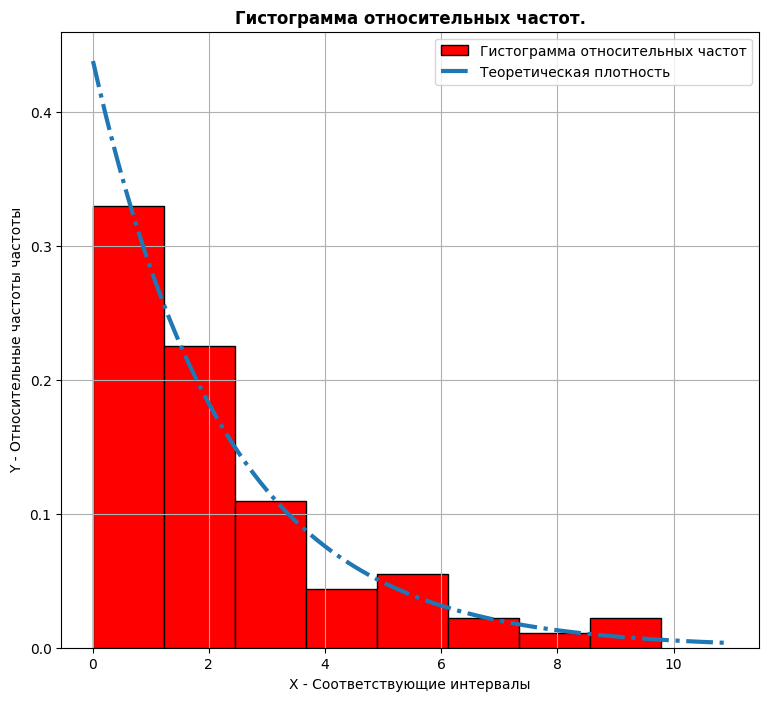

In [25]:
# Настройки графика:
plt.figure(figsize=(9,8))
plt.grid()

# Построение графика:

# 1 график:
plt.hist(np.array(sub_data[:-1]),
         bins = l,
         color='red',
         edgecolor='black',
         density=True,
         label='Гистограмма относительных частот')

# 2 график:
x = np.linspace(mini, maxi, 100)
y = [E(x_arg) for x_arg in x]
plt.plot(x,
         y,
         linestyle="-.",
         linewidth=3,
         label="Теоретическая плотность")


# Приписочки:
plt.title("Гистограмма относительных частот.", fontweight = 'bold')
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Относительные частоты частоты')
plt.legend()

# Вывод графика:
plt.show()